In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import tree
import graphviz

# 1. Preparing the data sets

In [58]:
attributes = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]
data = pd.read_csv('nursery.data.csv', names=attributes)
data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [59]:
# pre-process data
# map each value to a number

dictMap = {}
for col in data.columns[:-1]:
    uniqueVals = data[col].unique()
    for i in range(len(uniqueVals)):
        dictMap[uniqueVals[i]] = i+1
    updateCol = data[col].map(dictMap)
    data[col] = updateCol
    dictMap = {}
    
data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,1,1,1,1,1,1,1,1,recommend
1,1,1,1,1,1,1,1,2,priority
2,1,1,1,1,1,1,1,3,not_recom
3,1,1,1,1,1,1,2,1,recommend
4,1,1,1,1,1,1,2,2,priority
...,...,...,...,...,...,...,...,...,...
12955,3,5,4,4,3,2,2,2,spec_prior
12956,3,5,4,4,3,2,2,3,not_recom
12957,3,5,4,4,3,2,3,1,spec_prior
12958,3,5,4,4,3,2,3,2,spec_prior


## Split data and visualize the distributions of classes

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'not_recom'),
  Text(1, 0, 'priority'),
  Text(2, 0, 'recommend'),
  Text(3, 0, 'spec_prior'),
  Text(4, 0, 'very_recom')])

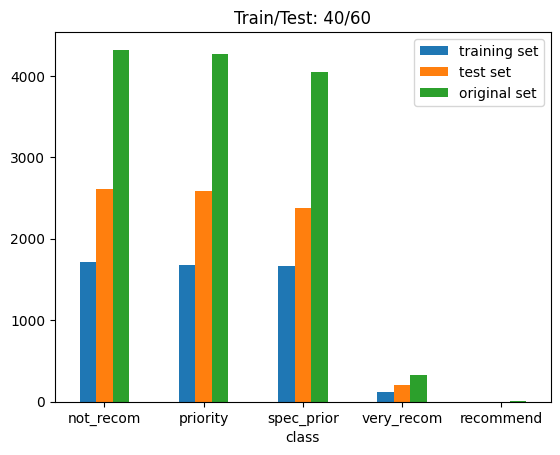

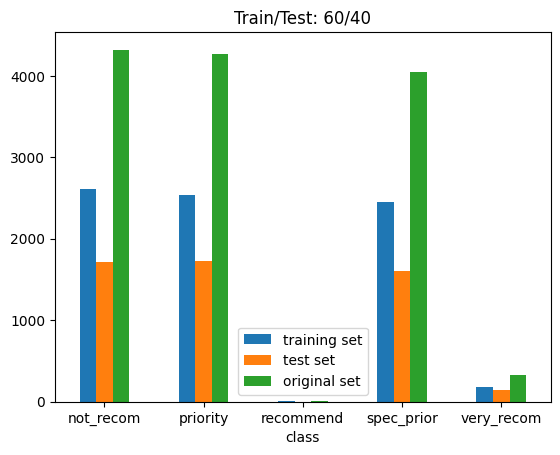

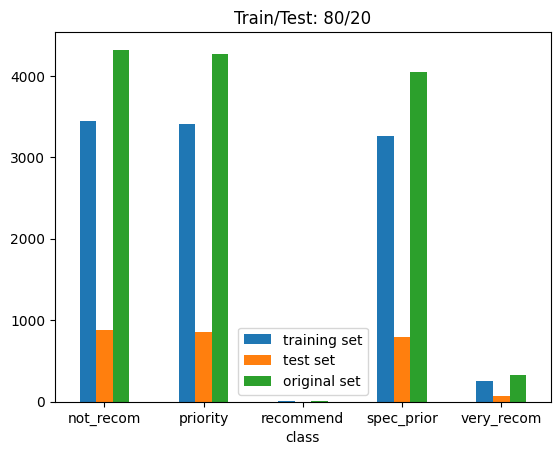

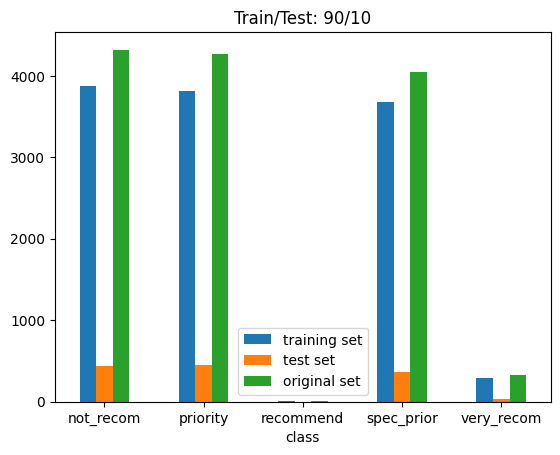

In [60]:
X_data = data.iloc[:, :-1] # values of attributes
y_data = data.iloc[:, -1] # values of target (classes)

# proportion 40/60
feature_train1, feature_test1, label_train1, label_test1 = train_test_split(X_data, y_data, test_size=0.6, random_state=162, shuffle=True)
tmp=pd.DataFrame({"training set": label_train1.value_counts(),
                    "test set": label_test1.value_counts(),
                     "original set": y_data.value_counts()})
tmp.plot(kind='bar')
plt.title('Train/Test: 40/60')
plt.xlabel('class')
plt.xticks(rotation=0)

# proportion 60/40
feature_train2, feature_test2, label_train2, label_test2 = train_test_split(X_data, y_data, test_size=0.4, random_state=162, shuffle=True)
tmp=pd.DataFrame({"training set": label_train2.value_counts(),
                    "test set": label_test2.value_counts(),
                     "original set": y_data.value_counts()})
tmp.plot(kind='bar')
plt.title('Train/Test: 60/40')
plt.xlabel('class')
plt.xticks(rotation=0)

# proportion 80/20
feature_train3, feature_test3, label_train3, label_test3 = train_test_split(X_data, y_data, test_size=0.2, random_state=162, shuffle=True)
tmp=pd.DataFrame({"training set": label_train3.value_counts(),
                    "test set": label_test3.value_counts(),
                     "original set": y_data.value_counts()})
tmp.plot(kind='bar')
plt.title('Train/Test: 80/20')
plt.xlabel('class')
plt.xticks(rotation=0)

# proportion 90/10
feature_train4, feature_test4, label_train4, label_test4 = train_test_split(X_data, y_data, test_size=0.1, random_state=162, shuffle=True)
tmp=pd.DataFrame({"training set": label_train4.value_counts(),
                    "test set": label_test4.value_counts(),
                     "original set": y_data.value_counts()})
tmp.plot(kind='bar')
plt.title('Train/Test: 90/10')
plt.xlabel('class')
plt.xticks(rotation=0)

## 2. Building and Evaluating the decision tree classifiers

### For 40/60

Train/Test: 40/60


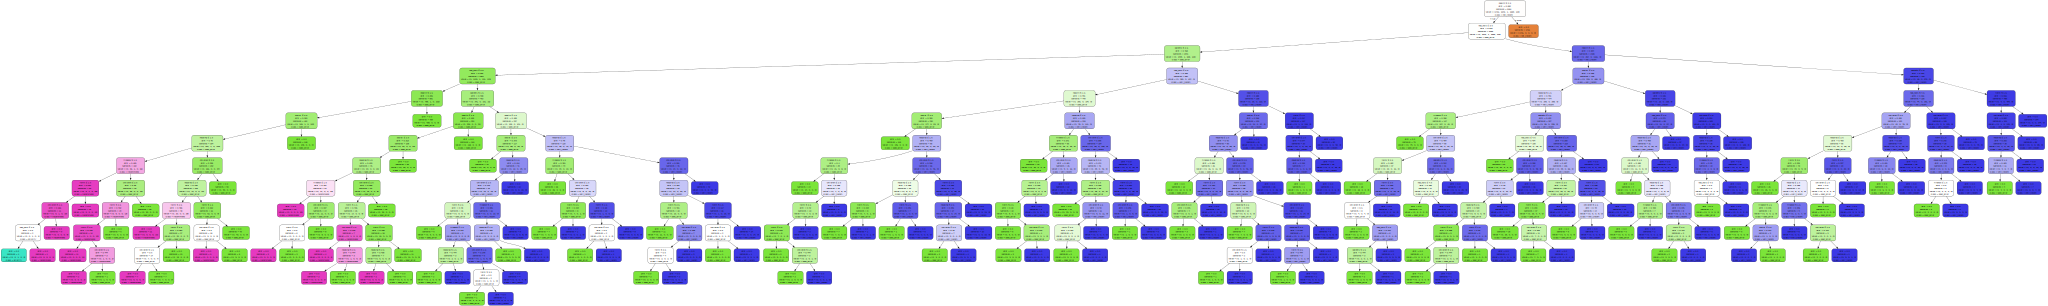

In [61]:
print('Train/Test: 40/60')

clf = tree.DecisionTreeClassifier()
clf = clf.fit(feature_train1, label_train1)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_train1.columns, 
                                class_names=label_train1.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2605
    priority       0.99      0.99      0.99      2590
   recommend       0.33      1.00      0.50         1
  spec_prior       0.99      0.99      0.99      2375
  very_recom       1.00      0.96      0.98       205

    accuracy                           0.99      7776
   macro avg       0.86      0.99      0.89      7776
weighted avg       0.99      0.99      0.99      7776



<Axes: >

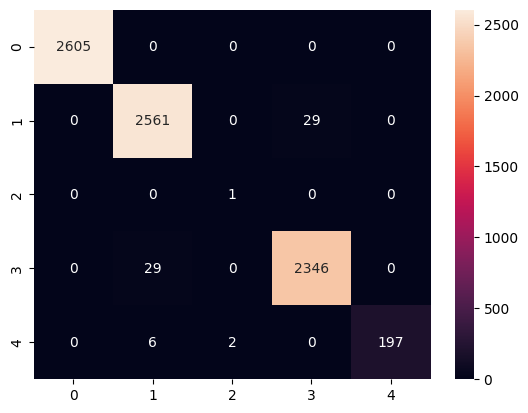

In [62]:
y_pred = clf.predict(feature_test1)

print(classification_report(label_test1, y_pred))

confMat = confusion_matrix(label_test1, y_pred)
sns.heatmap(confMat, annot=True, fmt=".0f")

### For 60/40

Train/Test: 60/40


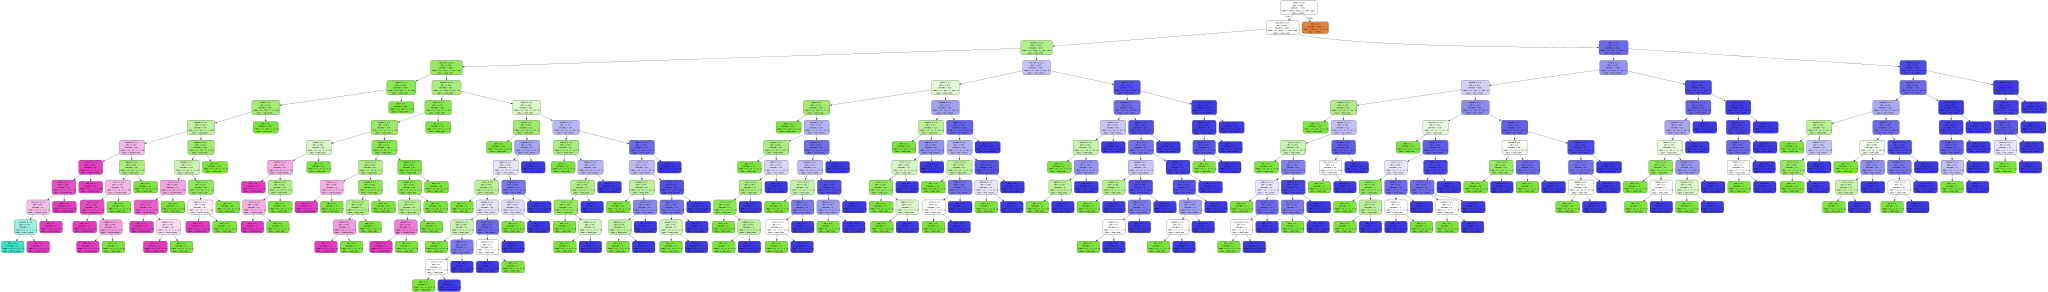

In [63]:
print('Train/Test: 60/40')

clf = tree.DecisionTreeClassifier()
clf = clf.fit(feature_train2, label_train2)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_train2.columns, 
                                class_names=label_train2.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1713
    priority       0.99      0.99      0.99      1726
  spec_prior       0.99      0.99      0.99      1599
  very_recom       1.00      0.99      0.99       146

    accuracy                           0.99      5184
   macro avg       1.00      0.99      0.99      5184
weighted avg       0.99      0.99      0.99      5184



<Axes: >

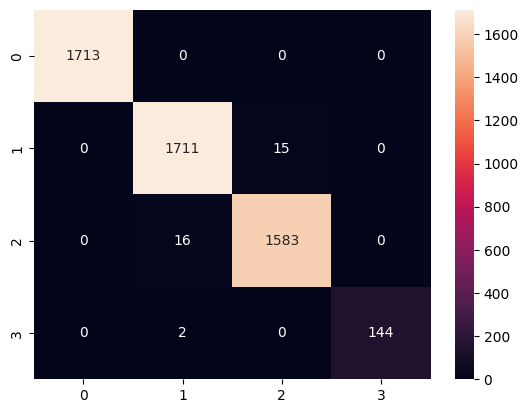

In [64]:
y_pred = clf.predict(feature_test2)

print(classification_report(label_test2, y_pred))

confMat = confusion_matrix(label_test2, y_pred)
sns.heatmap(confMat, annot=True, fmt=".0f")

### For 80/20

Train/Test: 80/20


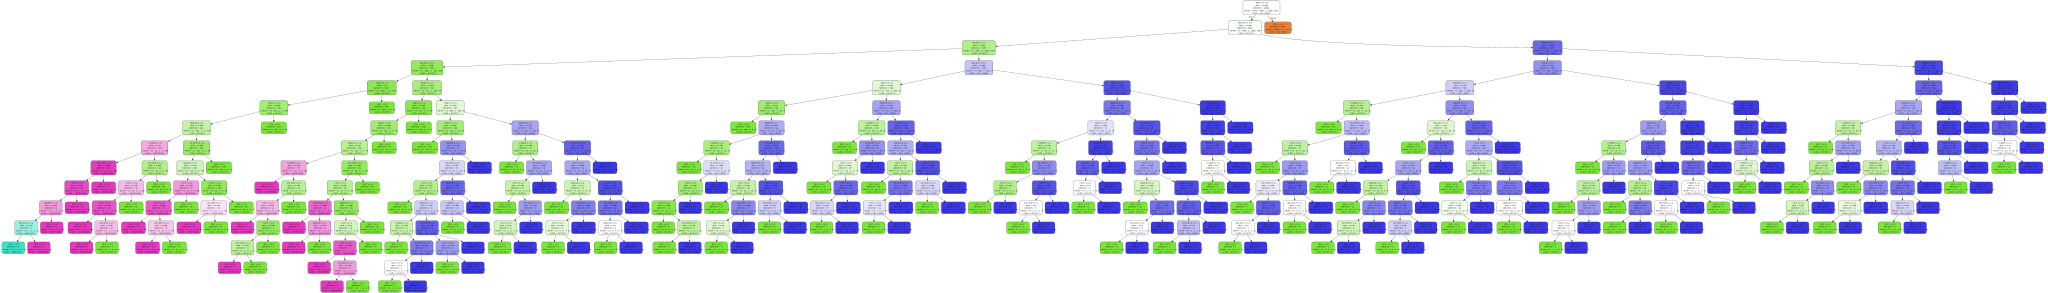

In [65]:
print('Train/Test: 80/20')

clf = tree.DecisionTreeClassifier()
clf = clf.fit(feature_train3, label_train3)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_train3.columns,
                                class_names=label_train3.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       873
    priority       1.00      0.99      0.99       857
  spec_prior       0.99      0.99      0.99       788
  very_recom       1.00      1.00      1.00        74

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



<Axes: >

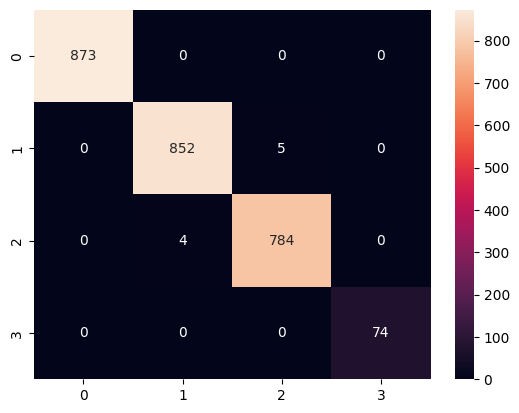

In [66]:
y_pred = clf.predict(feature_test3)

print(classification_report(label_test3, y_pred))

confMat = confusion_matrix(label_test3, y_pred)
sns.heatmap(confMat, annot=True, fmt=".0f")

### For 90/10

Train/Test: 90/10


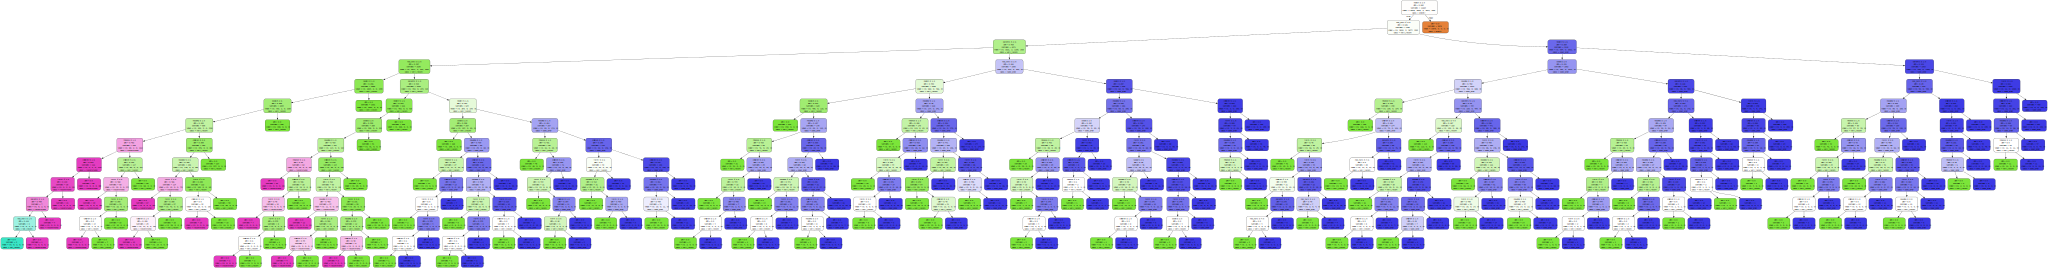

In [67]:
print('Train/Test: 90/10')

clf = tree.DecisionTreeClassifier()
clf = clf.fit(feature_train4, label_train4)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_train4.columns, 
                                class_names=label_train4.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       442
    priority       1.00      1.00      1.00       451
  spec_prior       1.00      1.00      1.00       367
  very_recom       1.00      1.00      1.00        36

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296



<Axes: >

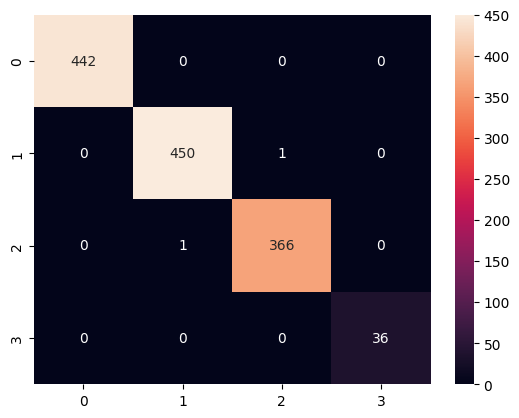

In [68]:
y_pred = clf.predict(feature_test4)

print(classification_report(label_test4, y_pred))

confMat = confusion_matrix(label_test4, y_pred)
sns.heatmap(confMat, annot=True, fmt=".0f")

# 3. The depth and accuracy of a decision tree

In [77]:
# For 90/10
def visualizeTree(depth):
    print('Max depth =', depth)
    
    # Build decision tree
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(feature_train4, label_train4)
    
    # Accuracy score on the test set
    print('Accuracy:', end=' ')
    print(clf.score(feature_test4, label_test4), '(on test set)')
    #print(clf.score(feature_train4, label_train4), '(on training set)')
    
    # Visualize
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_train4.columns,
                                    class_names=label_train4.unique(), filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

Max depth = None
Accuracy: 0.9984567901234568 (test set)
1.0 (training set)


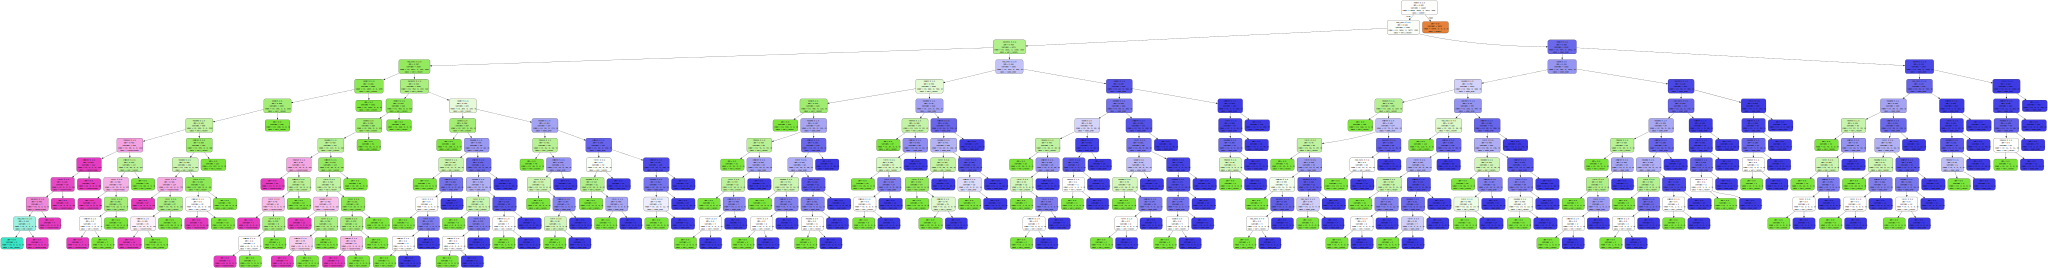

In [78]:
visualizeTree(None)

Max depth = 2
Accuracy: 0.8287037037037037 (test set)
0.8247599451303155 (training set)


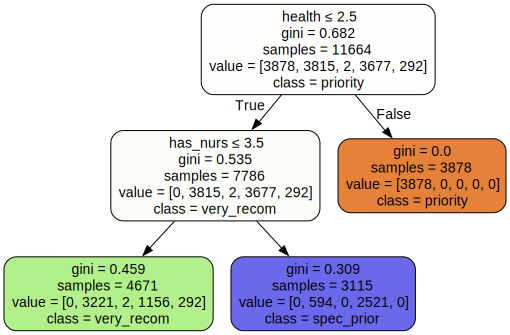

In [79]:
visualizeTree(2)

Max depth = 3
Accuracy: 0.8395061728395061 (test set)
0.8485939643347051 (training set)


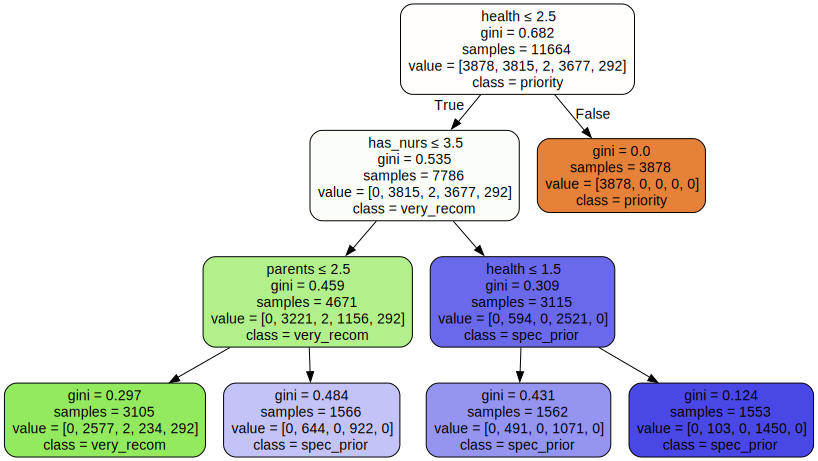

In [80]:
visualizeTree(3)

Max depth = 4
Accuracy: 0.8533950617283951 (test set)
0.8593964334705075 (training set)


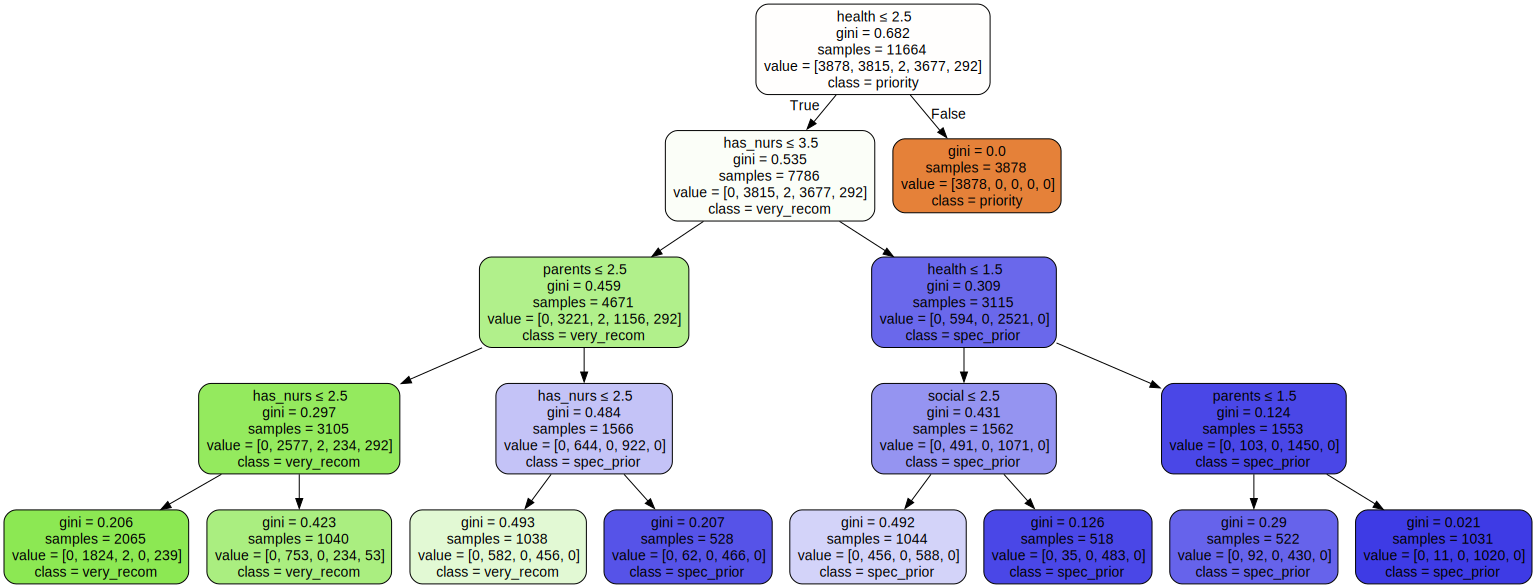

In [81]:
visualizeTree(4)

Max depth = 5
Accuracy: 0.8904320987654321 (test set)
0.8847736625514403 (training set)


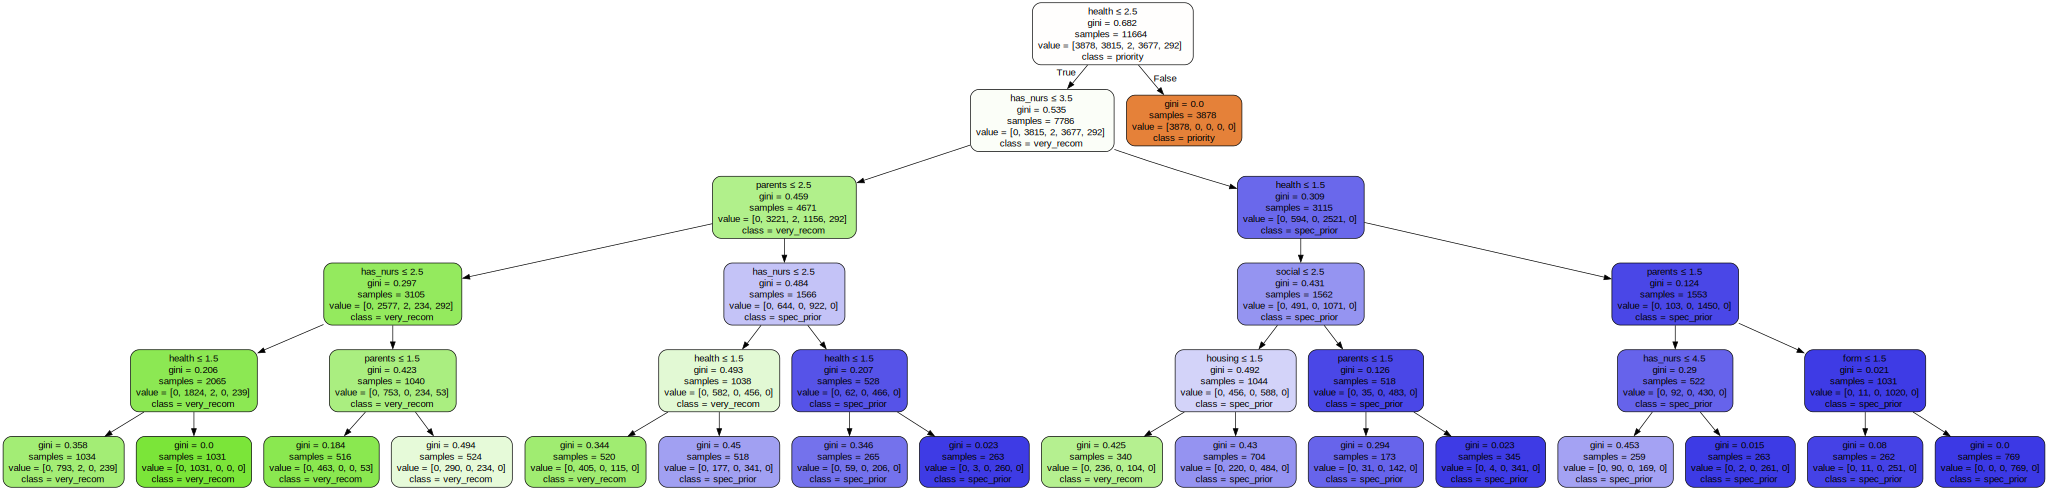

In [82]:
visualizeTree(5)

Max depth = 6
Accuracy: 0.9189814814814815 (test set)
0.9086934156378601 (training set)


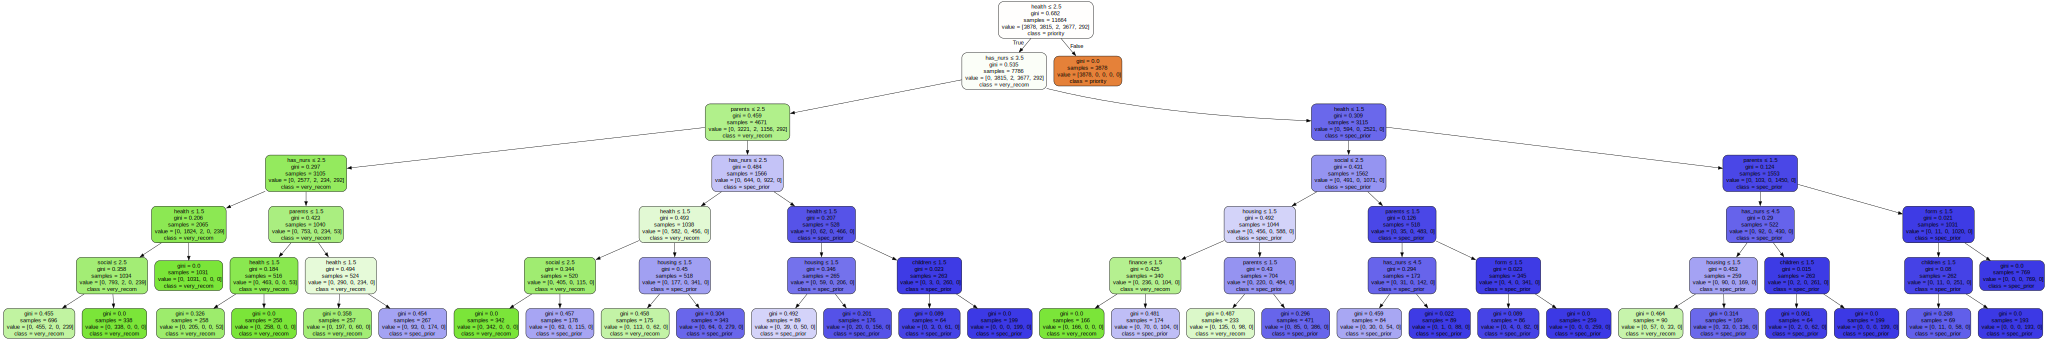

In [83]:
visualizeTree(6)

Max depth = 7
Accuracy: 0.9305555555555556 (test set)
0.9381001371742113 (training set)


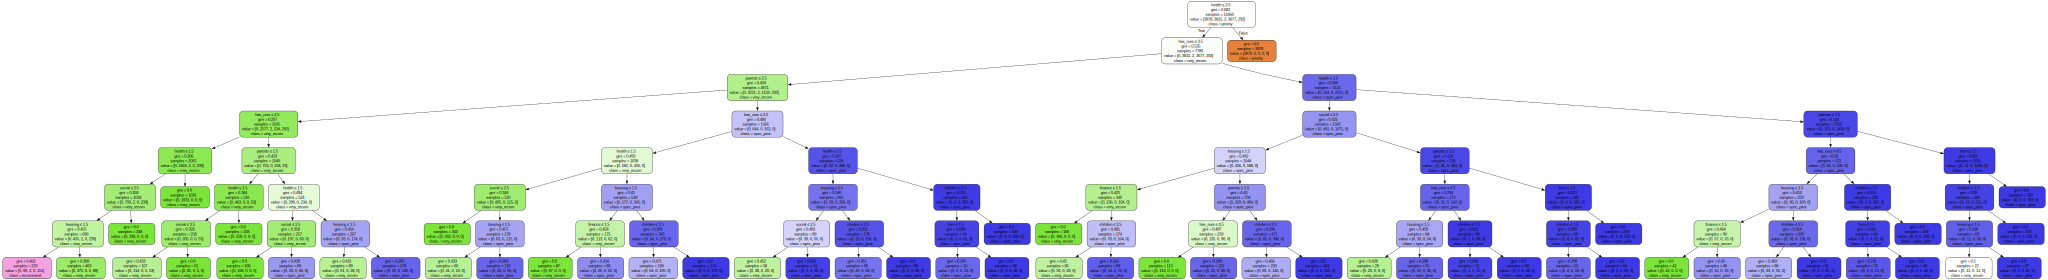

In [84]:
visualizeTree(7)